## Observations and Insights 

In [ ]:
# Three Observations: 
# 1. The data on final tumour volume was consistent as there were little (1) outliers in the data (for the four drug regimen).
# 2. From the Capomulin trials, the tumour sizes seems related to the weight of the mouse (higher weight, larger volume) - strong correlation.
# 3. From the four leading drugs, Capomulin and Ramicane seem to be more effective (smaller final tumour volume then the other two). 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
raw_data = pd.merge( mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
raw_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice.
unique = raw_data["Mouse ID"].unique()
print(len(unique))

249


In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
raw_data["Mouse ID"].value_counts()

g989    13
z578    10
a699    10
j913    10
x402    10
        ..
b447     1
h428     1
o848     1
t573     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [35]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRows = pd.DataFrame(raw_data[raw_data.duplicated(["Mouse ID", "Timepoint"])])
duplicateRows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Removing all data on dupliate mouse ID 
clean_data = raw_data.loc[ raw_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
#initial data set with duplicates
duplicate_check = raw_data.loc[raw_data["Mouse ID"]=="g989",:]
duplicate_check

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Checking the number of mice in the clean DataFrame.
duplicate_check = clean_data.loc[clean_data["Mouse ID"]=="g989",:]
duplicate_check

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen = clean_data["Drug Regimen"].unique()
regimen_data = clean_data.groupby("Drug Regimen")

regimen_mean = regimen_data["Tumor Volume (mm3)"].mean()
regimen_median = regimen_data["Tumor Volume (mm3)"].median()
regimen_var = regimen_data["Tumor Volume (mm3)"].var()
regimen_std = regimen_data["Tumor Volume (mm3)"].std()
regimen_SEM = regimen_data["Tumor Volume (mm3)"].sem()

regimen_summary = pd.merge (regimen_mean, regimen_median, on="Drug Regimen", how="outer", suffixes=("mean", "median"))
regimen_summary2 = pd.merge (regimen_var, regimen_std, on="Drug Regimen", how="outer", suffixes=("var", "std"))
regimen_summary = pd.merge (regimen_summary, regimen_summary2, on="Drug Regimen", how="outer")
regimen_summary = pd.merge(regimen_summary, regimen_SEM, on="Drug Regimen", how="outer")

regimen_summary = regimen_summary.rename (columns = {"Tumor Volume (mm3)mean" : "Mean", 
                                                     "Tumor Volume (mm3)median" : "Median", 
                                                     "Tumor Volume (mm3)var" : "Variance", 
                                                     "Tumor Volume (mm3)std" : "Standard Deviation", 
                                                     "Tumor Volume (mm3)" : "Standard Error of Mean"})
regimen_summary

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

aggregated_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
aggregated_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

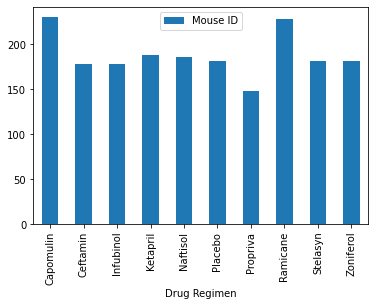

In [41]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mouse_count = pd.DataFrame(regimen_data["Mouse ID"].count())

mouse_count.plot(kind="bar")


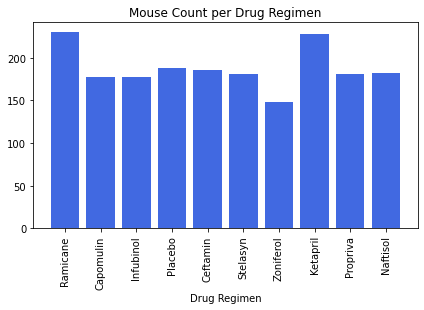

In [42]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_regimen = clean_data["Drug Regimen"].unique()
mouse_count = regimen_data["Mouse ID"].count()

plt.bar(drug_regimen, mouse_count, color="royalblue", align="center")
plt.xticks(drug_regimen, drug_regimen, rotation=90)
plt.tight_layout()
plt.title("Mouse Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.show()

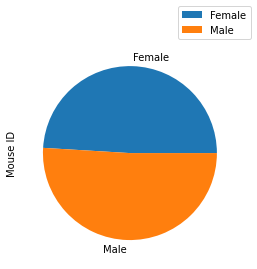

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders = clean_data.groupby("Sex")

gender_summary = pd.DataFrame(clean_data.groupby("Sex").count()["Mouse ID"])
gender_summary.plot(y="Mouse ID", kind="pie").legend(bbox_to_anchor=(0.7, 1))

<ipython-input-44-24a1c87aa901>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_summary, labels = labels)


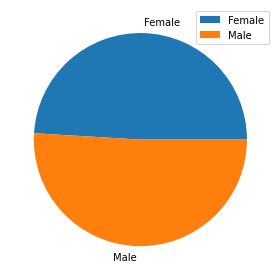

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
plt.pie(gender_summary, labels = labels)
plt.legend(loc="upper right")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
summarized_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin")|(clean_data["Drug Regimen"] == "Ramicane")|(clean_data["Drug Regimen"] == "Infubinol")|(clean_data["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
mouse_final = summarized_data.groupby("Mouse ID")
mouse_finaltimes = pd.DataFrame(mouse_final["Timepoint"].max())
mouse_finaltimes = mouse_finaltimes.rename( columns= {"Timepoint" : "Final Time"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
summarized_data = pd.merge(summarized_data, mouse_finaltimes, on="Mouse ID", how="outer")

import numpy as np 

#create new column with final tumour data and remove all other data points 
summarized_data["Final Tumour Volume (mm3)"] = np.where(summarized_data["Timepoint"]==summarized_data["Final Time"], summarized_data["Tumor Volume (mm3)"], None)
summarized_data = summarized_data.dropna(axis=0, how="any", subset=["Final Tumour Volume (mm3)"])
summarized_data = summarized_data.set_index("Mouse ID")
summarized_data


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Time,Final Tumour Volume (mm3)
Mouse ID,,,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1,45,22.0501
s185,Capomulin,Female,3,17,45,23.343598,1,45,23.3436
x401,Capomulin,Female,16,15,45,28.484033,0,45,28.484
m601,Capomulin,Male,22,17,45,28.430964,1,45,28.431
g791,Ramicane,Male,11,16,45,29.128472,1,45,29.1285
...,...,...,...,...,...,...,...,...,...
x822,Ceftamin,Male,3,29,45,61.386660,3,45,61.3867
y163,Infubinol,Female,17,27,45,67.685569,3,45,67.6856
y769,Ceftamin,Female,6,27,45,68.594745,4,45,68.5947


In [46]:
#OBJECTIVE: to create four box plots for each drug of interest and to highlight outliers through different styling on plot 
#box plots should all be on one plot 

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
first=[]
second=[]
third=[]
IQR=[]
upperbound = []
lowerbound = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:  
    # add subset
    subset = summarized_data[summarized_data["Drug Regimen"] == drug]
    final_tumour = subset["Final Tumour Volume (mm3)"]
    quartile = final_tumour.quantile([0.25, 0.50, 0.75])
    first.append(quartile[0.25])
    second.append(quartile[0.5])
    third.append(quartile[0.75])
    IQR_value= quartile[0.75] - quartile[0.25]
    IQR.append(IQR_value)
    upperbound_value = quartile[0.75] + 1.5*IQR_value
    lowerbound_value = quartile[0.25] - 1.5*IQR_value
    upperbound.append (upperbound_value)
    lowerbound.append (lowerbound_value)
    drug_outliers = subset.loc[(subset["Final Tumour Volume (mm3)"] >= upperbound_value) | (subset["Final Tumour Volume (mm3)"] <= lowerbound_value)]["Final Tumour Volume (mm3)"]
    print(drug)
    print( f"Upperbound = {upperbound_value}, Lowerbound = {lowerbound_value}")
    print(f"Outliers = {drug_outliers}")
    print("..........................")

stats_summary = pd.DataFrame ({"Drug Regimen" : treatments,
                "First" : first, 
                "Second" : second, 
                "Third" : third, 
                "IRQ" : IQR, 
                "Upperbound" : upperbound, 
                "Lowerbound" : lowerbound})
stats_summary = stats_summary.set_index("Drug Regimen")

stats_summary







Capomulin
Upperbound = 51.83201549, Lowerbound = 20.70456164999999
Outliers = Series([], Name: Final Tumour Volume (mm3), dtype: object)
..........................
Ramicane
Upperbound = 54.30681135, Lowerbound = 17.912664470000003
Outliers = Series([], Name: Final Tumour Volume (mm3), dtype: object)
..........................
Infubinol
Upperbound = 82.74144559000001, Lowerbound = 36.83290494999999
Outliers = Mouse ID
c326    36.3213
Name: Final Tumour Volume (mm3), dtype: object
..........................
Ceftamin
Upperbound = 87.66645829999999, Lowerbound = 25.355449580000002
Outliers = Series([], Name: Final Tumour Volume (mm3), dtype: object)
..........................


,First,Second,Third,IRQ,Upperbound,Lowerbound
Drug Regimen,,,,,,
Capomulin,32.377357,38.125164,40.159220,7.781863,51.832015,20.704562
Ramicane,31.560470,36.561652,40.659006,9.098537,54.306811,17.912664
Infubinol,54.048608,60.165180,65.525743,11.477135,82.741446,36.832905
Ceftamin,48.722078,59.851956,64.299830,15.577752,87.666458,25.355450


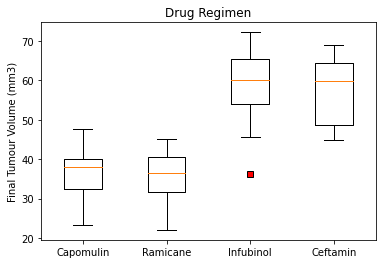

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_list = []

for drug in treatments: 
    subset = summarized_data[summarized_data["Drug Regimen"] == drug]
    data = subset["Final Tumour Volume (mm3)"]
    data_list.append(data)

red_square = dict(markerfacecolor="r", marker="s")

fig, ax = plt.subplots()
ax.boxplot(data_list, flierprops=red_square, labels = treatments)
ax.set_title("Drug Regimen")
ax.set_ylabel("Final Tumour Volume (mm3)")

plt.show()

## Line and Scatter Plots

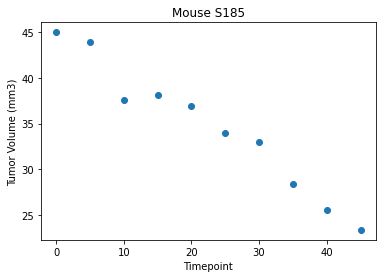

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# choosen mouse = s185

mouse_s185 = clean_data.loc[ clean_data["Mouse ID"] == "s185"]

plt.scatter( mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse S185")
plt.show()

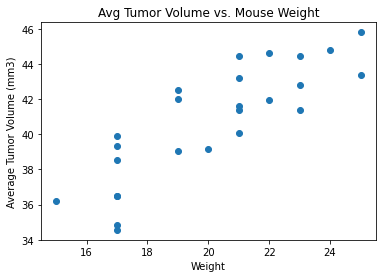

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_data = clean_data.loc[ clean_data["Drug Regimen"] == "Capomulin"]
Capomulin_summary = Capomulin_data.groupby("Mouse ID").mean()

plt.scatter(Capomulin_summary["Weight (g)"], Capomulin_summary["Tumor Volume (mm3)"])
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Avg Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

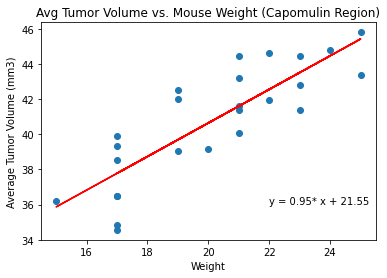

Correlation Coefficient is equal = 0.84


In [64]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


slope, intercept, rvalue, pvalue, stderr = st.linregress(Capomulin_summary["Weight (g)"], Capomulin_summary["Tumor Volume (mm3)"])
regress_values = slope * Capomulin_summary["Weight (g)"] + intercept 

plt.scatter(Capomulin_summary["Weight (g)"], Capomulin_summary["Tumor Volume (mm3)"])
plt.plot(Capomulin_summary["Weight (g)"], regress_values, color="r")
plt.annotate ("y = " + str(round(slope,2)) + "* x + " + str(round(intercept,2)), xy = (22,36))
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Avg Tumor Volume vs. Mouse Weight (Capomulin Region)")
plt.show()

print(f"Correlation Coefficient is equal = {round(rvalue,2)}")